In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [107]:
df_train = pd.read_csv('../data/daily_climate/DailyDelhiClimateTrain.csv')
df_test = pd.read_csv('../data/daily_climate/DailyDelhiClimateTest.csv')

df = pd.concat([df_train, df_test])
print(df_train.shape)
print(df_test.shape)
print(df.shape)

df['date'] = pd.to_datetime(df['date']) # convert the date column to a datetime object
df.set_index('date', inplace=True) # convert the date column into the index

# resample the data to MONTHLY averages
df_monthly = df.resample('ME').mean()
df_monthly.reset_index(drop=True, inplace=True)
df_monthly['t'] = df_monthly.index # convert week number into a numerical value
display(df_monthly.tail())

# resample the data to WEEKLY averages
df_weekly = df.resample('W').mean()
df_weekly.reset_index(drop=True, inplace=True)
df_weekly['t'] = df_weekly.index # convert week number into a numerical value
display(df_weekly.tail())


(1462, 5)
(114, 5)
(1576, 5)


,meantemp,humidity,wind_speed,meanpressure,t
47,17.672565,68.840384,6.132705,1016.290993,47
48,15.532408,77.901123,6.939139,987.681449,48
49,18.349981,64.375728,7.566294,1015.574251,49
50,23.753760,48.009694,8.884385,1010.469641,50
51,30.753663,30.408185,9.128446,1004.564831,51


,meantemp,humidity,wind_speed,meanpressure,t
221,30.203515,36.735544,10.218594,1007.073980,221
222,28.805189,30.570238,10.904628,1006.816270,222
223,29.820862,27.801304,8.387557,1005.399093,223
224,33.511508,32.168254,7.654325,1001.522222,224
225,32.000000,27.142857,12.157143,1004.142857,225


In [109]:
print(df_monthly.info())
print(df_monthly.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      52 non-null     float64
 1   humidity      52 non-null     float64
 2   wind_speed    52 non-null     float64
 3   meanpressure  52 non-null     float64
 4   t             52 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.2 KB
None
        meantemp   humidity  wind_speed  meanpressure          t
count  52.000000  52.000000   52.000000     52.000000  52.000000
mean   25.219359  60.290015    6.913098   1010.570299  25.500000
std     7.011625  14.233139    1.957343     33.191188  15.154757
min    12.074770  28.938249    2.117500    934.847045   0.000000
25%    18.806643  53.401453    5.539693   1000.542880  12.750000
50%    27.434092  62.615731    7.324859   1008.816926  25.500000
75%    30.935999  70.944592    8.577592   1015.408444  38.250000
max    34.946836  84.5

In [92]:
scaler = StandardScaler()
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']  # example feature columns
df_monthly[features] = scaler.fit_transform(df_monthly[features])
df_weekly[features] = scaler.fit_transform(df_weekly[features])

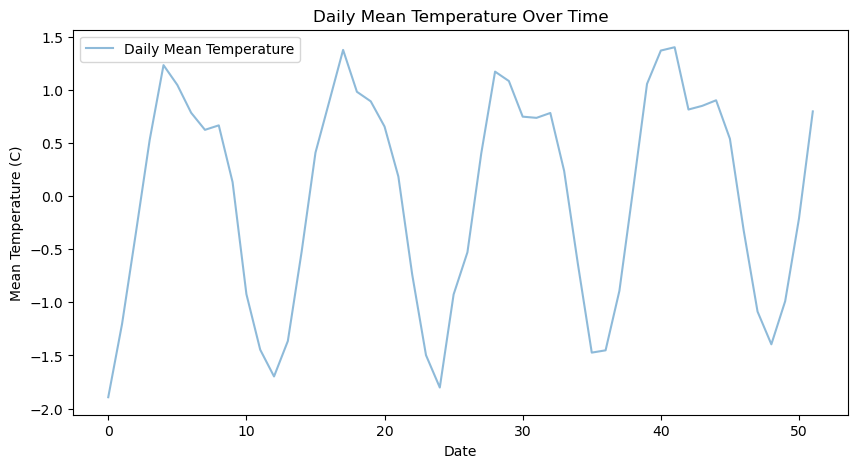

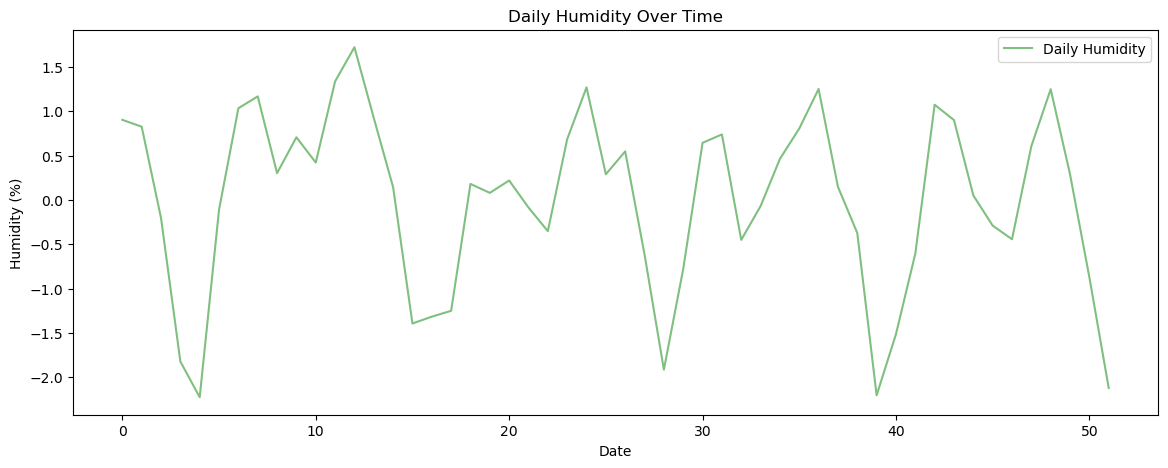

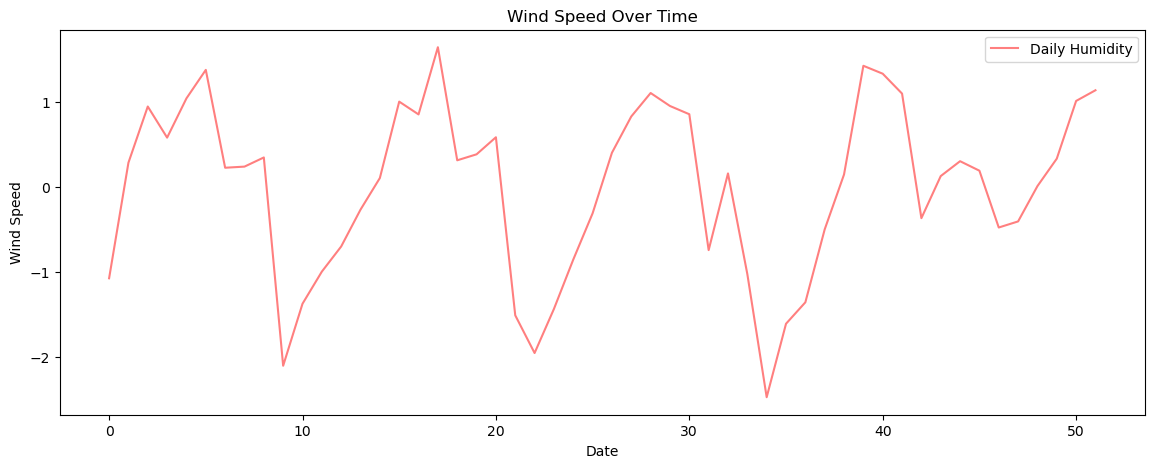

In [93]:
plt.figure(figsize=(10, 5))
plt.plot(df.t, df['meantemp'], label='Daily Mean Temperature', alpha = 0.5)
# plt.plot(df.t, df['humidity'], label='Daily Humidity', color='green', alpha = 0.5)
plt.title('Daily Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (C)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(df.t, df['humidity'], label='Daily Humidity', color='green', alpha = 0.5)
plt.title('Daily Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(df.t, df['wind_speed'], label='Daily Humidity', color='red', alpha = 0.5)
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
# plt.yscale('log')
plt.legend()
plt.show()

### `train-test split`

In [94]:
# x, y
t_train, t_test, Y_train, Y_test = train_test_split(df['t'], df[['meantemp','humidity', 'wind_speed', 'meanpressure']], test_size=0.5, random_state=42, shuffle=False)

In [96]:
Y_test

,meantemp,humidity,wind_speed,meanpressure
26,-0.528746,0.548081,0.406572,0.102833
27,0.400874,-0.614224,0.834129,-0.095181
28,1.171273,-1.913342,1.110381,-0.245693
29,1.082701,-0.778114,0.957511,-0.341077
30,0.747450,0.644607,0.860286,-0.358031
31,0.736106,0.739284,-0.740840,-0.273865
32,0.782076,-0.449879,0.162992,-0.158778
33,0.237021,-0.069260,-1.023037,0.026812
34,-0.643040,0.463618,-2.473958,0.123481
35,-1.473201,0.805662,-1.608366,0.209925


In [97]:
import os
os.makedirs('../data/daily_climate/train', exist_ok=True)
os.makedirs('../data/daily_climate/test', exist_ok=True)

t_train.to_csv('../data/daily_climate/train/X_train.csv', index=False)
t_test.to_csv('../data/daily_climate/test/X_test.csv', index=False)
Y_train.to_csv('../data/daily_climate/train/y_train.csv', index=False)
Y_test.to_csv('../data/daily_climate/test/y_test.csv', index=False)